In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from app import wrangle_without_dt

In [ ]:
base_df = pd.read_csv('/content/Displacement_and_Gentrification_Recommendation_Inventory_8.csv')

In [ ]:
base_df.head(10)

,Year (CY),Type,Source,Summary,Recommendation/Resolution,Implementing Department,Action Category,Direct/Indirect?,Targeted at Homelessness?,Actionable?,Status of the Recommendation/Resolution
0,2011,OCA Audit,Affordable Housing: Rental Housing and Acquisi...,NaN,In order to support the efficiency and effecti...,NHCD,Monitoring,Indirect,No,NaN,NaN
1,2011,OCA Audit,Affordable Housing: Rental Housing and Acquisi...,NaN,The NHCD Director should improve existing proc...,NHCD,Recommendations for process improvements,Indirect,No,NaN,NaN
2,2012,OCA Audit,Austin Energy Customer Assistance Programs Audit,NaN,AE management should work with Council to iden...,Austin Energy,Financing,Indirect,No,NaN,NaN
3,2012,OCA Audit,Austin Energy Customer Assistance Programs Audit,NaN,AE management should work with the Plus 1 Prog...,Austin Energy,Financing,Indirect,No,NaN,NaN
4,2015,OCA Audit,Austin Energy Low-Income Weatherization Progra...,NaN,5. Austin Energy management should continue to...,Austin Energy,Financing,Indirect,No,NaN,NaN
5,2015,OCA Audit,Austin Energy Low-Income Weatherization Progra...,NaN,1. Austin Energy management should ensure adeq...,Austin Energy,Financing,Indirect,No,NaN,NaN
6,2015,OCA Audit,Austin Energy Low-Income Weatherization Progra...,NaN,4. Austin Energy management should clarify the...,Austin Energy,Financing,Indirect,No,NaN,NaN
7,2015,OCA Audit,Prioritization of Affordable Housing Developme...,NaN,1. The NHCD Director should initiate a policy ...,NHCD,Preserving and expanding the supply of afforda...,Indirect,No,NaN,NaN
8,2015,OCA Audit,Prioritization of Affordable Housing Developme...,NaN,2. The NHCD Director should organize affordabl...,NHCD,Preserving and expanding the supply of afforda...,Indirect,No,NaN,NaN
9,2015,OCA Audit,Prioritization of Affordable Housing Developme...,NaN,3. The NHCD Director should regularly report t...,NHCD,Preserving and expanding the supply of afforda...,Indirect,No,NaN,NaN


In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Year (CY)                                 541 non-null    object
 1   Type                                      541 non-null    object
 2   Source                                    540 non-null    object
 3   Summary                                   196 non-null    object
 4   Recommendation/Resolution                 541 non-null    object
 5   Implementing Department                   517 non-null    object
 6   Action Category                           541 non-null    object
 7   Direct/Indirect?                          541 non-null    object
 8   Targeted at Homelessness?                 541 non-null    object
 9   Actionable?                               142 non-null    object
 10  Status of the Recommendation/Resolution   216 non-

In [ ]:
base_df.describe(include='all')

,Year (CY),Type,Source,Summary,Recommendation/Resolution,Implementing Department,Action Category,Direct/Indirect?,Targeted at Homelessness?,Actionable?,Status of the Recommendation/Resolution
count,541,541,540,196,541,517,541,541,541,142,216
unique,19,5,265,196,536,19,8,2,2,2,43
top,2017,Council Resolution,Community Development Commission,City Manager to explore options and take appro...,Approves up to $15 million in private activity...,Council,Recommendations for planning and approach,Indirect,No,Actionable,Presumed Implemented
freq,89,222,55,1,4,189,155,387,495,133,64


In [ ]:
from app import wrangle_without_dt
import pandas as pd
fixed_df = wrangle_without_dt('/content/Displacement_and_Gentrification_Recommendation_Inventory_8.csv')

In [ ]:
fixed_df.rename(columns={'status_of_the_recommendation_resolution_':'status_of_the_recommendation_solution'}, inplace=True)

In [ ]:
fixed_df

,year_cy,type,implementing_department,action_category,direct_indirect,targeted_at_homelessness,actionable,status_of_the_recommendation_solution
0,2011,OCA Audit,NHCD,Monitoring,Indirect,No,Not actionable,Implemented: GO Bond Referendum
1,2011,OCA Audit,NHCD,Recommendations for process improvements,Indirect,No,Not actionable,Implemented: GO Bond Referendum
2,2012,OCA Audit,Austin Energy,Financing,Indirect,No,Not actionable,Implemented: GO Bond Referendum
3,2012,OCA Audit,Austin Energy,Financing,Indirect,No,Not actionable,Implemented: GO Bond Referendum
4,2015,OCA Audit,Austin Energy,Financing,Indirect,No,Not actionable,Implemented: GO Bond Referendum
...,...,...,...,...,...,...,...,...
536,2013,Council Resolution,City Manager,Preserving and expanding the supply of afforda...,Direct,No,Actionable,Implemented
537,2002,Task Force,Council,Recommendations for planning and approach,Direct,No,Actionable,Status unknown: commission and taskforce recom...
538,2004,Council Resolution,City Manager,Controlling land for community development,Direct,No,Actionable,"Status unknown: according to CMO, item predate..."
539,2016,Council Resolution,City Manager,Financing,Direct,No,Actionable,Implemented


In [ ]:
"""
Replace all Columns from random values to Boolean.
Have to change type of targeted at homelessness column as it is an int value
"""
fixed_df.replace({'direct_indirect': {'Direct' : True, 'Indirect' : False}}, inplace = True)
fixed_df['targeted_at_homelessness'].astype(str)
fixed_df.replace({'targeted_at_homelessness': {'No' : False, 'Yes': True}}, inplace = True)
fixed_df.rename(columns = {'direct_indirect' : 'direct'}, inplace = True)
    

In [ ]:
fixed_df

,year_cy,type,implementing_department,action_category,direct,targeted_at_homelessness,actionable,status_of_the_recommendation_solution
0,2011,OCA Audit,NHCD,Monitoring,False,False,Not actionable,Implemented: GO Bond Referendum
1,2011,OCA Audit,NHCD,Recommendations for process improvements,False,False,Not actionable,Implemented: GO Bond Referendum
2,2012,OCA Audit,Austin Energy,Financing,False,False,Not actionable,Implemented: GO Bond Referendum
3,2012,OCA Audit,Austin Energy,Financing,False,False,Not actionable,Implemented: GO Bond Referendum
4,2015,OCA Audit,Austin Energy,Financing,False,False,Not actionable,Implemented: GO Bond Referendum
...,...,...,...,...,...,...,...,...
536,2013,Council Resolution,City Manager,Preserving and expanding the supply of afforda...,True,False,Actionable,Implemented
537,2002,Task Force,Council,Recommendations for planning and approach,True,False,Actionable,Status unknown: commission and taskforce recom...
538,2004,Council Resolution,City Manager,Controlling land for community development,True,False,Actionable,"Status unknown: according to CMO, item predate..."
539,2016,Council Resolution,City Manager,Financing,True,False,Actionable,Implemented


## What Can we Determine based off the data?
We could make a model that predicts whether an action will be targeted at homelessness or not, and whether it was direct, or indirect on the populous
Does they implementing department make a difference on what type of action it becomes? How about on whether this is targeted at homelessness or not?

In [ ]:
pd.crosstab(fixed_df['targeted_at_homelessness'], fixed_df['direct'], margins=True)

direct,False,True,All
targeted_at_homelessness,,,
False,353,142,495
True,34,12,46
All,387,154,541


Data is heavily skewed to the false-side of the data. We should consider scaling or normalizing for better use.

In [ ]:
pd.crosstab(fixed_df['targeted_at_homelessness'], fixed_df['direct'], normalize='index')

direct,False,True
targeted_at_homelessness,,
False,0.713131,0.286869
True,0.739130,0.260870


In [ ]:
# Likelihood of an action being direct
dir_action = 145/541

#Likelihood of action being direct GIVEN it being targeted at homelessness
tar_action = 12/46

# Probability of being targeted at homelessness
P_B = 46/541

# Probability of being targeted at homelessness and the action being direct
P_A_and_B = 12/541

P_A_given_B = P_A_and_B / P_B
print("Probability of action being targeted(directly and indirectly) at homelessness :", P_B * 100)
print("Probability of action being direct given that it is targeted at homelessness:", P_A_given_B * 100)

Probability of action being targeted(directly and indirectly) at homelessness : 8.502772643253234
Probability of action being direct given that it is targeted at homelessness: 26.08695652173913


In [ ]:
fixed_df.nunique()

year_cy                                  19
type                                      5
implementing_department                  19
action_category                           8
direct                                    2
targeted_at_homelessness                  2
actionable                                2
status_of_the_recommendation_solution    43
dtype: int64

Does the type of action that it is affect whether it is a direct or indirect action?

In [ ]:
pd.crosstab(fixed_df['type'], fixed_df['direct'], margins=True)

direct,False,True,All
type,,,
Commission Report,55,22,77
Community Report,67,21,88
Council Resolution,129,93,222
OCA Audit,56,1,57
Task Force,80,17,97
All,387,154,541


In [ ]:
pd.crosstab(fixed_df['type'], fixed_df['direct'], normalize= 'index')

direct,False,True
type,,
Commission Report,0.714286,0.285714
Community Report,0.761364,0.238636
Council Resolution,0.581081,0.418919
OCA Audit,0.982456,0.017544
Task Force,0.824742,0.175258


In [ ]:
# What do the percentages look like?
pd.crosstab(fixed_df['targeted_at_homelessness'], fixed_df['direct'], normalize='index') * 100

direct,False,True
targeted_at_homelessness,,
False,71.313131,28.686869
True,73.913043,26.086957


We may want to consider doing subsampling of the data to provide a better distribution. This data is focused highly on the false

#Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

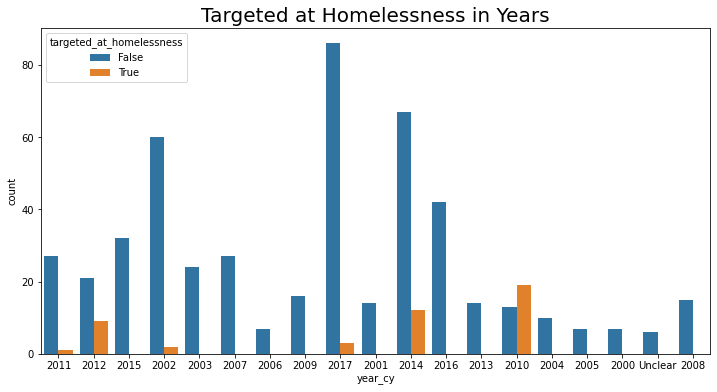

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=fixed_df['year_cy'],hue=fixed_df['targeted_at_homelessness'])
plt.title('Targeted at Homelessness in Years',fontsize=20)
plt.show()

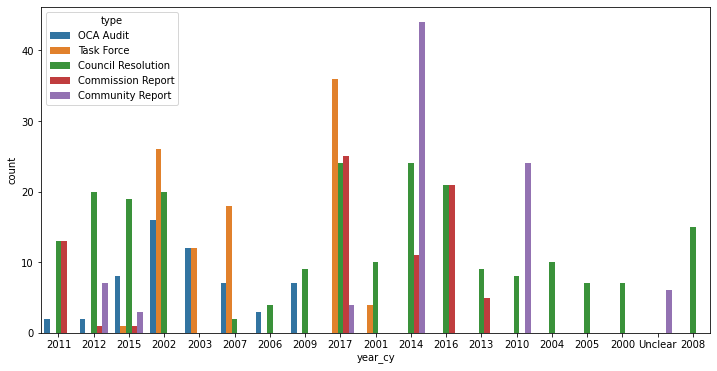

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=fixed_df['year_cy'],hue=fixed_df['type'])
plt.show()

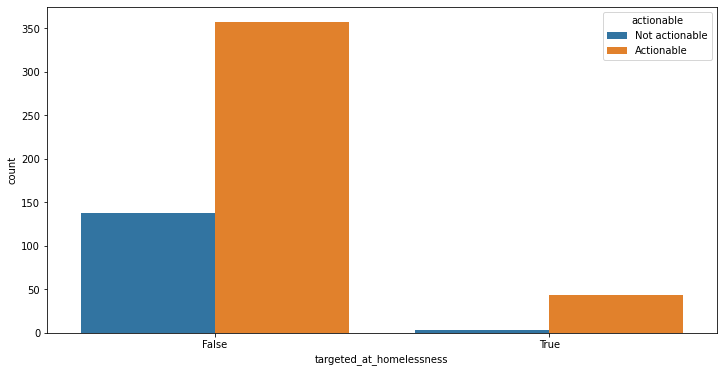

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=fixed_df['targeted_at_homelessness'],hue=fixed_df['actionable'])
plt.show()

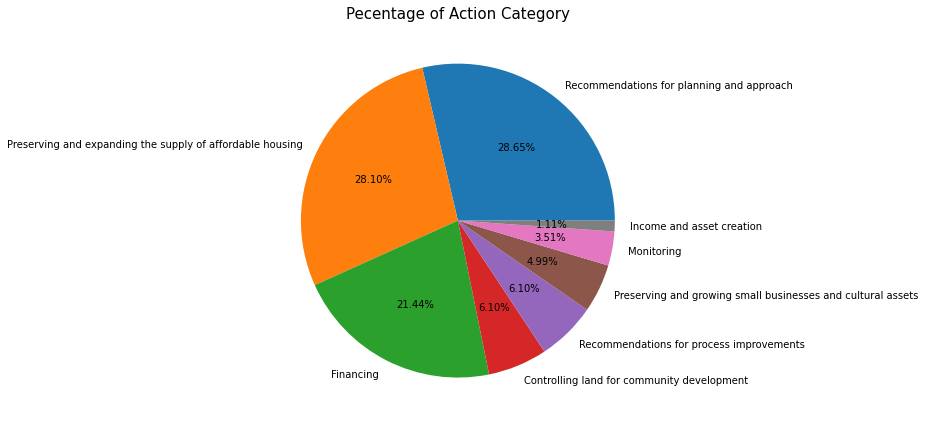

In [ ]:
d1=fixed_df['action_category'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(d1.values,labels=d1.index,autopct='%0.2f%%')
plt.title('Pecentage of Action Category',fontsize=15)

plt.tight_layout()
plt.show()

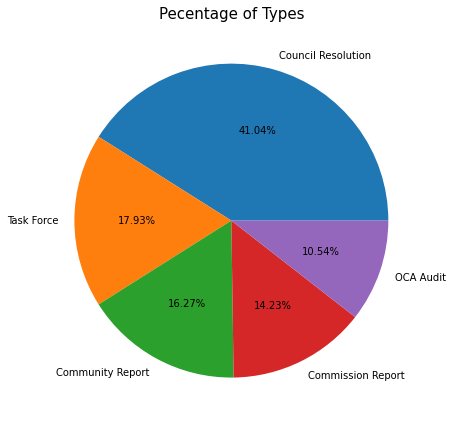

In [ ]:
d1=fixed_df['type'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(d1.values,labels=d1.index,autopct='%0.2f%%')
plt.title('Pecentage of Types',fontsize=15)

plt.tight_layout()
plt.show()

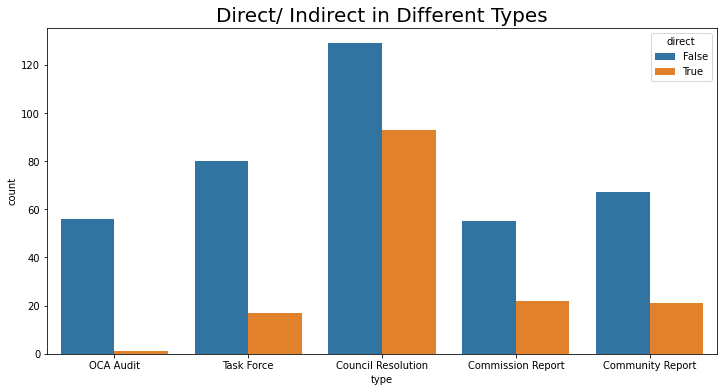

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=fixed_df['type'],hue=fixed_df['direct'])
plt.title('Direct/ Indirect in Different Types',fontsize=20)
plt.show()